<font size=7>Bootstrap Aggregation (Bagging)

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
## Next we need to load in the data and store it into X (input features) and y (target).
# The parameter as_frame is set equal to True so we do not lose the feature names when loading the data. 
# (sklearn version older than 0.23 must skip the as_frame argument as it is not supported)

In [3]:
data= datasets.load_wine(as_frame=True)
X=data.data
y=data.target

In [4]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=22)

In [5]:
dtree= DecisionTreeClassifier(random_state=22)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=22)

In [6]:
y_pred= dtree.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


<font size=6>Creating a Bagging classifier

In [8]:
'''For bagging we need to set the parameter n_estimators,
this is the number of base classifiers that our model is going to aggregate together.

For this sample dataset the number of estimators is relatively low,
it is often the case that much larger ranges are explored. Hyperparameter tuning is usually done with a grid search, but for now we will use a select set of values for the number of estimators'''

from sklearn.ensemble import BaggingClassifier

In [11]:
estimator_range=[2,4,6,8,10,12,14,16]

In [12]:
models= []
scores= []

for n_estimators in estimator_range:
    #create bagging classifier
    clf= BaggingClassifier(n_estimators= n_estimators, random_state=22)
    
    #fit the model
    clf.fit(X_train, y_train)
    
    #Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true= y_test, y_pred= clf.predict(X_test)))

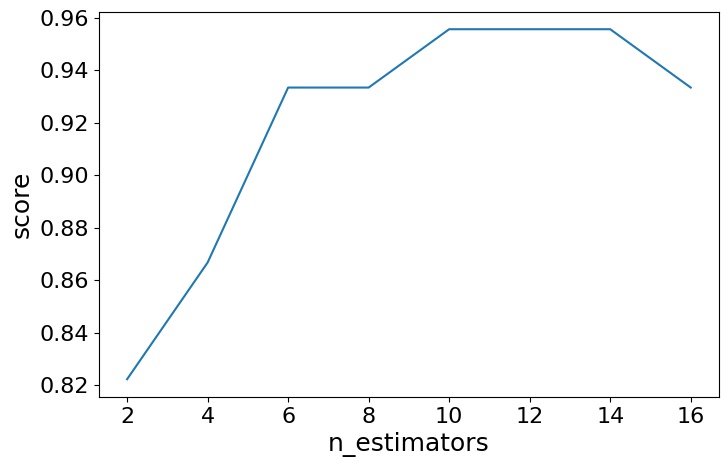

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize= 18)
plt.ylabel("score", fontsize= 18)
plt.tick_params(labelsize = 16)
plt.show()

<font size=6>Another example (out-of-bag metric)

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier


In [15]:
data = datasets.load_wine(as_frame= True)
X= data.data
y= data.target

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=22)
oob_model = BaggingClassifier(n_estimators=12, oob_score= True, random_state= 22)
oob_model.fit(X_train,y_train)

BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

In [17]:
print(oob_model.oob_score_)

0.9398496240601504


<font size=6>Plotting with decision tree

[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesium <= 147.0\ngini = 0.036\nsamples = 32\nvalue = [54, 1, 0]'),
 Text(0.75, 0

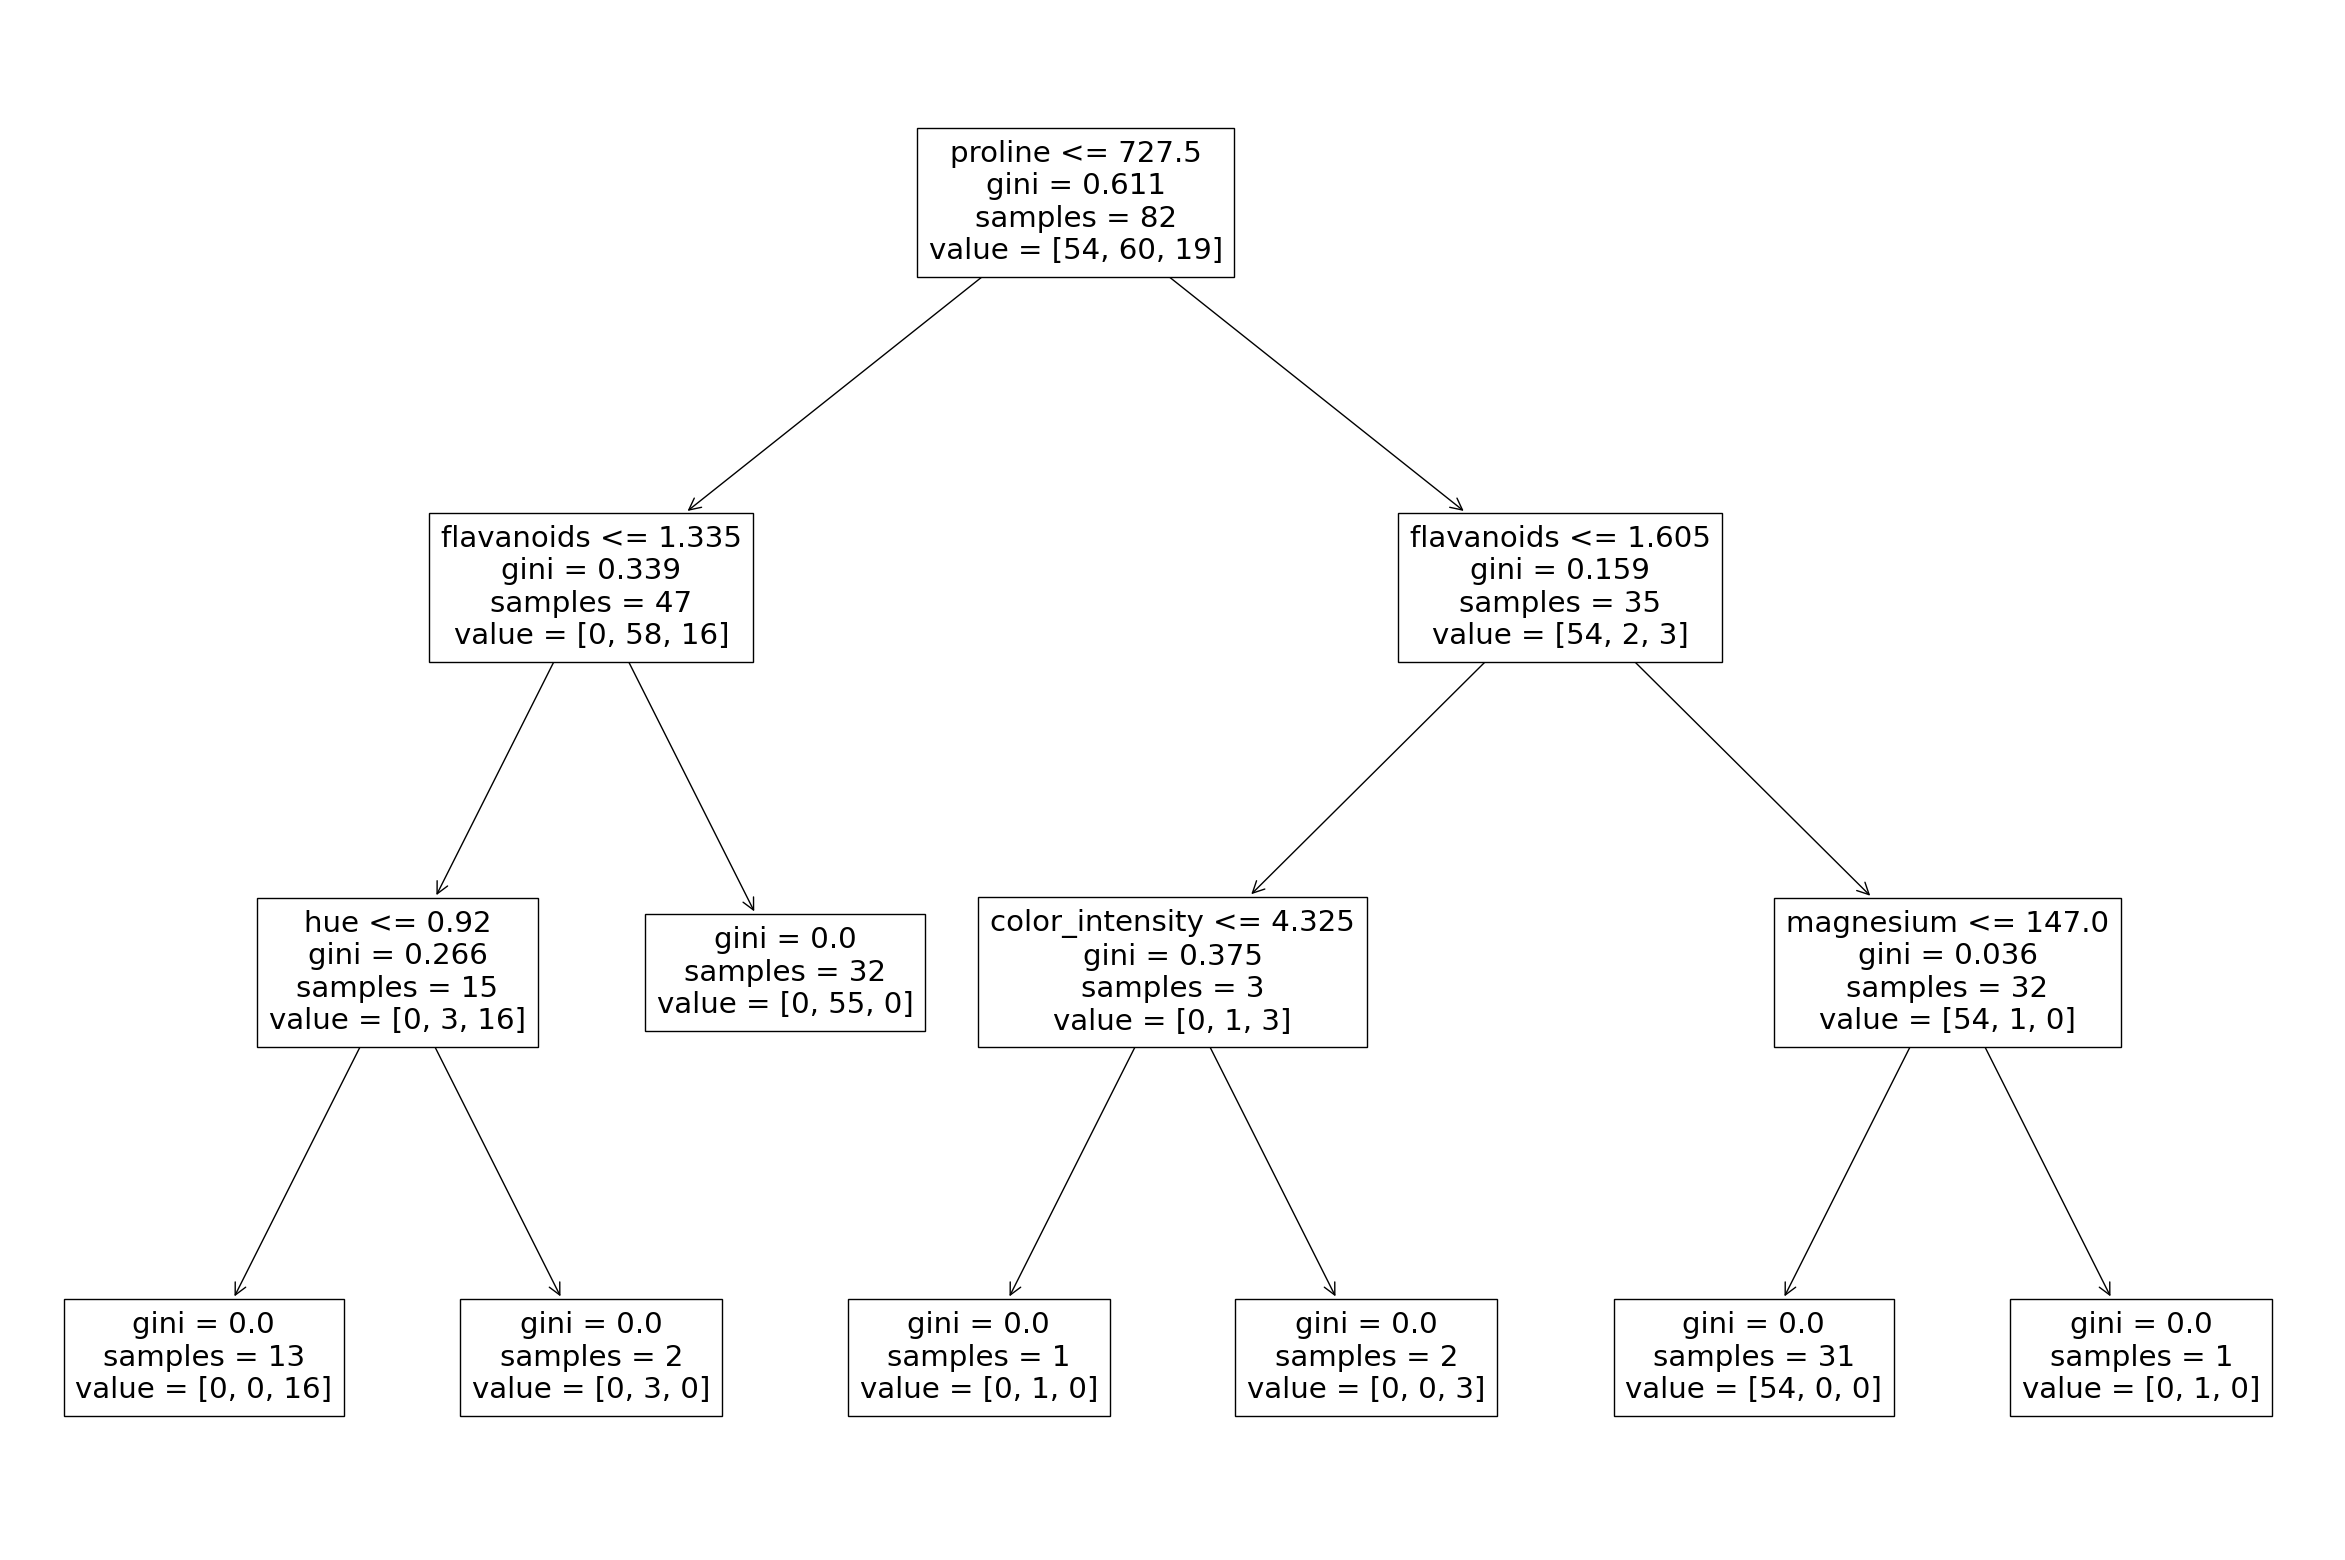

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 20))
plot_tree(clf.estimators_[0], feature_names = X.columns)